In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Created on Wed May 23 23:50:53 2018
# @author: ist

# this is the augmentation configuration we will use for testing:
# only rescaling


In [2]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K




Using TensorFlow backend.


In [3]:


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/Users/bharathts/Documents/Personal/Learning/dogscats/train'
validation_data_dir = '/Users/bharathts/Documents/Personal/Learning/dogscats/valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 10
batch_size = 16



In [11]:
K.image_data_format()

'channels_last'

In [4]:

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)



In [13]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('softmax'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', # or categorical_crossentropy
              optimizer='rmsprop',# or adagrad
              metrics=['accuracy'])




In [6]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


In [18]:
# train_datagen.flow(mypath+'cat.2.jpg')
train_generator

In [7]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)


validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 23000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
Found 2000 images belonging to 2 classes.


In [8]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save('model.h5')

Epoch 1/10
125/125 [==============================] - 51s 411ms/step - loss: 0.7705 - acc: 0.5515 - val_loss: 0.6759 - val_acc: 0.5487
Epoch 2/10
125/125 [==============================] - 51s 405ms/step - loss: 0.6760 - acc: 0.5895 - val_loss: 0.6234 - val_acc: 0.6850
Epoch 3/10
125/125 [==============================] - 50s 396ms/step - loss: 0.6463 - acc: 0.6370 - val_loss: 0.6146 - val_acc: 0.6550
Epoch 4/10
125/125 [==============================] - 50s 398ms/step - loss: 0.6376 - acc: 0.6665 - val_loss: 0.5769 - val_acc: 0.6775
Epoch 5/10
125/125 [==============================] - 50s 401ms/step - loss: 0.6057 - acc: 0.6705 - val_loss: 0.5574 - val_acc: 0.6987
Epoch 6/10
125/125 [==============================] - 50s 401ms/step - loss: 0.5926 - acc: 0.6880 - val_loss: 0.5556 - val_acc: 0.7050
Epoch 7/10
125/125 [==============================] - 50s 401ms/step - loss: 0.5802 - acc: 0.7115 - val_loss: 0.5544 - val_acc: 0.7238
Epoch 8/10
125/125 [==============================] - 5

In [9]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


# dimensions of our images
img_width, img_height = 150, 150

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

mypath = "/Users/bharathts/Documents/Personal/Learning/dogscats/predict/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)
# predicting images
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(mypath+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

['cat.2.jpg', 'cat.23.jpg', 'cat.5.jpg', 'dog.18.jpg', 'dog.9.jpg']
cat.2.jpg: dog
cat.23.jpg: cat
cat.5.jpg: cat
dog.18.jpg: dog
dog.9.jpg: dog
Total Dogs : 3
Total Cats : 2


In [15]:
train_datagen

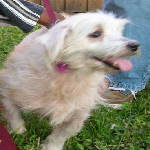

In [19]:
img